In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [3]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Data

In [4]:
# create some data using linear regression
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create x and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

In [5]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))

    # ploting train data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # ploting test data in green
    plt.scatter(test_data, test_labels, c="green", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", s=4, label="Predictions")

    plt.legend(prop={"size":14})

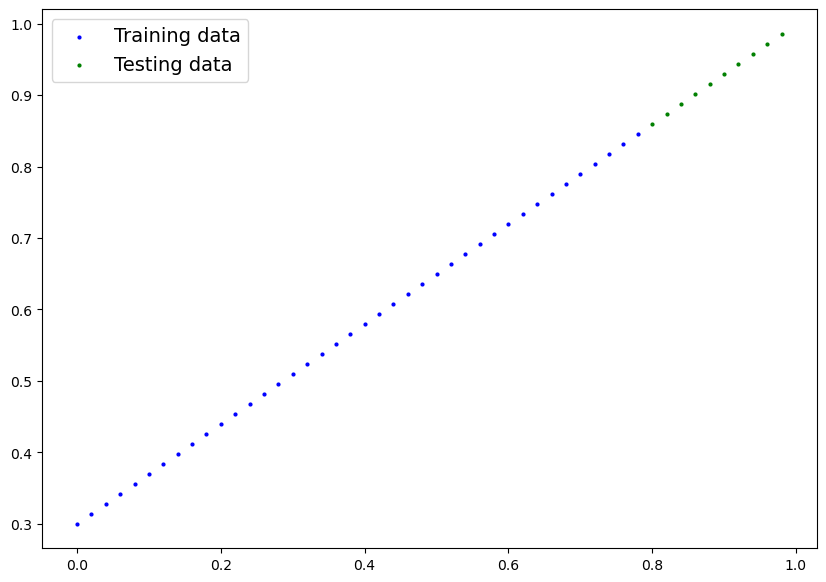

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

Building PyTorch Linear Model

In [8]:
# create a linear modil by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)  # input of size 1 and output of size 1 (we have 1 input map to 1 output)
        # nn.Linear implements linear regression formula and also create parameters

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel()    # here we created a instance of the model all the parameters will be random.
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Training

In [9]:
# loss function
loss_fn = nn.L1Loss() # same as mae

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# training loop
# torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_1.train()

    # forward pass
    y_pred = model_1(X_train)

    # loss calculation
    loss = loss_fn(y_pred, y_train)

    # optimizer
    optimizer.zero_grad()     # used to reset the gradients of all model parameters before performing backpropagation.

    # preform backpropagation
    loss.backward()          # compute gradients

    # optimizer step
    optimizer.step()    # updates the model's parameters using the computed gradients.

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"epoch:{epoch} | loss:{loss} | test loss:{test_loss}")

NameError: name 'model_1' is not defined

In [11]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6691]])),
             ('linear_layer.bias', tensor([0.3130]))])

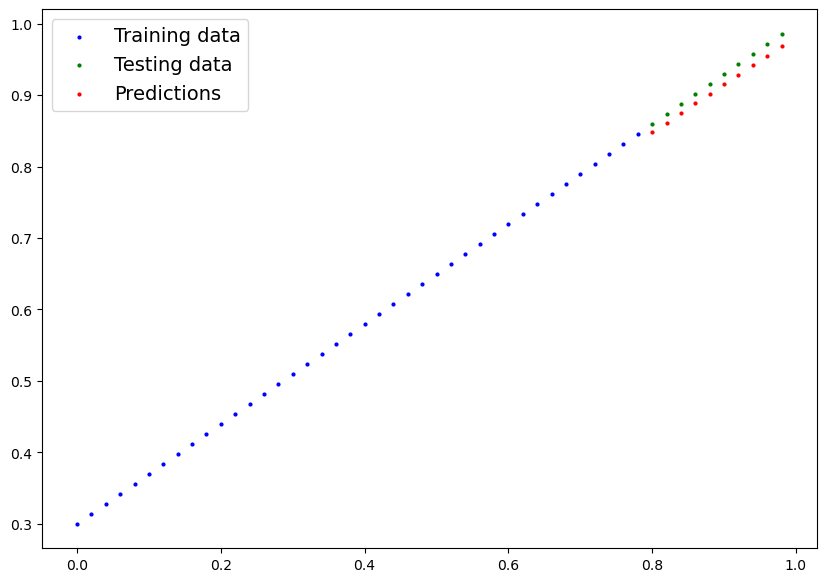

In [12]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

Saving and loading model 

In [13]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "prac_model_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)
print(f"Model saved to path: {MODEL_SAVE_PATH}")


Saving model to: models/prac_model_01.pth
Model saved to path: models/prac_model_01.pth


In [14]:
# loading model

# Create new instance
loaded_model_1 = LinearRegressionModel()

# load the saved model state_dict()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to the device
loaded_model_1.to(device)

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6691]])),
             ('linear_layer.bias', tensor([0.3130]))])

In [15]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6691]])),
             ('linear_layer.bias', tensor([0.3130]))])

In [16]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])